# Сборный проект

## Содержание:
- описание проекта;
- изучение данных из файла;
- исследовательский анализ данных;
- портрет пользователя каждого региона;
- проверка гипотез;
- вывод по работе над проектом;
- общий вывод

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».


## План действий

В нашей работе будет следующий план действий:
* импортируем библиотеки, загрузим файл данных, изучим его;
* посмотрим на названия столбоцов: если необходимо, приведем их к одному регистру;
* в столбцах преобразуем типы данных при необходимости, обработаем пропуски;
* проведем исследовательский анализ данных: посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам;
* изучим данные за актуальный период: выясним, какие платформы лидируют по продажам, растут или падают;
* построим графики, диаграммы, сделаем выводы;
* составим портрет пользователя каждого региона;
* проверим гипотезы;
* сделаем общий вывод

## Изучение данных из файла

In [1]:
# Импортируем библиотеки Pandas, Numpy, scipy.stats, matplotlib, seaborn
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)
plt.rcParams.update({'figure.max_open_warning': 0})

Сохраним имя файла в переменную:

In [2]:
df = pd.read_csv('D:/Project/5/games.csv')

In [3]:
# Выведем первые 10 строчек таблицы:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим общую информацию о данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашей таблице 11 колонок: 6 имеют тип "Вещественные числа", 5 имеют тип "Строка". Данные в колонках отличаются, необходимо будет установить, где и почему имеются пропущенные значение, будет ли этот факт влиять на результат и возможно ли будет чем-нибудь заменить пропущенные значения.

Согласно документации, файлы имеют следующее значение:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


Выведем названия колонок:

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Видим, что названия колонок написаны с большой буквы. Изменим это и сделаем все названия колонок с маленькой буквы:

In [6]:
# Для приведения букв к нижнему регистру используем метод `str.lower()`
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Рассмотрим каждый столбец на пропущенные значение, изменим тип данных при необходимости

#### Столбец `name` ("Название игры")

Вычислим количество пропущенных значений в столбце:

In [8]:
# Воспользуемся методом `isna().sum()`
df['name'].isna().sum()

2

Видим, что столбец содержит 2 пропущенных значения. Выведем их на экран:

In [9]:
df_name_isna = pd.isna(df['name']) 

In [10]:
df[df_name_isna]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Установить название игры не представляется возможным, поэтому удалим эти 2 строки. На результат нашей работы сильного влияния это не окажет

In [11]:
# Для удаления строк с неизвестными применяется метод `dropna()`. Дополнительно указывается параметр `subset`,
# которому передается столбец, где он должен искать пропуски
df = df.dropna(subset=['name'])

In [12]:
df['name'].isna().sum()

0

Тип данных данного столбца - `object`, что означает "строка". Менять тип данных не нужно

#### Столбец `platform` ("Платформа")

Вычислим количество пропущенных значений в столбце:

In [13]:
# Воспользуемся методом `isna().sum()`
df['platform'].isna().sum()

0

Пропущенных значений нет, тип данных данного столбца - `object`, что означает "строка". Менять тип данных не нужно

#### Столбец `year_of_release` ("Год выпуска")

Вычислим количество пропущенных значений в столбце:


In [14]:
# Воспользуемся методом `isna().sum()`
df['year_of_release'].isna().sum()

269

Количество пропущенных значений довольно большое. Рассмотрим их более внимательно

In [15]:
df_year_of_release_isna = pd.isna(df['year_of_release']) 

In [16]:
df[df_year_of_release_isna].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T


Попробуем установить год выпуска по названию игры:

In [17]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
1881,Madden NFL 2004,XB,"2,003.00",Sports,1.02,0.02,0.00,0.05,92.00,8.3,E
3889,Madden NFL 2004,GC,"2,003.00",Sports,0.40,0.10,0.00,0.01,94.00,7.7,E
5708,Madden NFL 2004,GBA,"2,003.00",Sports,0.22,0.08,0.00,0.01,70.00,6.6,E


Заполним пропущенные значения, если в названии игры ранее встречался год выпуска:

In [18]:
df.loc[df['year_of_release'].isna(), 'year_of_release'] = \
    df.loc[df['year_of_release'].isna(), 'name'].map(df.groupby('name')['year_of_release'].first())

In [19]:
df['year_of_release'].isna().sum()

146

In [20]:
df[df_year_of_release_isna].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,"2,003.00",Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,"2,003.00",Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,"2,008.00",Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,"1,994.00",Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,"2,008.00",Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+
719,Call of Duty 3,Wii,"2,006.00",Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T


Видим, что пропущенные значения сократились примерно в 2 раза. Изучим выборочное оставшееся значение:

In [21]:
df[df['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.00,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.00,6.8,T


Данная игра присутствует на всех платформах, но год выпуска установить не представляется возможным. Значение средним значением или медианой в данном случае неуместно. Посчитаем процент пропущенных значений в столбце "Год выпуска":

In [22]:
1-(146/16713)

0.9912642852869024

Видим, что процент пропущенных значений составляет около 1%. Можно удалить строки с пропущенными значениями в столбце, это существенно не повлияет на результат нашей работы:

In [23]:
df = df.dropna(subset=['year_of_release'])

In [24]:
df['year_of_release'].isna().sum()

0

Поменяем тип данных на целочисленный:

In [25]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Данные удалены, замена типа данных произведена успешно

#### Столбец `genre` ("Жанр игры")

Вычислим количество пропущенных значений в столбце:

In [27]:
# Воспользуемся методом `isna().sum()`
df['platform'].isna().sum()

0

Пропущенных значений нет, тип данных данного столбца - `object`, что означает "строка". Менять тип данных не нужно

#### Столбцы `na_sales` ("Продажи в Северной Америке (млн)"), `eu_sales` ("Продажи в Европе (млн)"), `jp_sales` ("Продажи в Японии (млн)"), `other_sales` ("Продажи в других странах (млн)")

Данные столбцы пропущенных значений не имеют, приводить тип данных к целочисленному типу нет необходимости

#### Столбец `critic_score` ("Оценка критиков (максимум 100)")

Вычислим количество пропущенных значений в столбце:

In [28]:
# Воспользуемся методом `isna().sum()`
df['critic_score'].isna().sum()

8492

Почти половина значений пропущена. Просто так их удалять нельзя, поэтому изучим их внимательно:

In [29]:
df_critic_score_isna = pd.isna(df['critic_score']) 

In [30]:
df[df_critic_score_isna].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Попробуем сгруппировать:

In [31]:
df.loc[df['critic_score'].isna(), 'critic_score'] = \
    df.loc[df['critic_score'].isna(), 'name'].map(df.groupby('name')['critic_score'].first())

In [32]:
df['critic_score'].isna().sum()

7532

In [33]:
1-(7532/8492)

0.11304757418747058

Заполнили около 900 значений (почти 11%). Но все равно, пропущенных данных много. Возможно, в некоторые игры критики не играли и не оценивали их. Оставим пропуски как есть в `NaN`, потому что переименование в другое имя (например, `unknown` (неизвестно)) не позволит нам поменять тип столбца на вещественные числа (`float`), а будет выдавать тип "строка" `object`)

#### Столбец `user_score` ("Оценка пользователей (максимум 10)")

Вычислим количество пропущенных значений в столбце:

In [34]:
# Воспользуемся методом `isna().sum()`
df['user_score'].isna().sum()

6633

Почти треть пропущенных значений. Попробуем также заполнить пропущенные значения по имени:

In [35]:
df.loc[df['user_score'].isna(), 'user_score'] = \
    df.loc[df['user_score'].isna(), 'name'].map(df.groupby('name')['user_score'].first())

In [36]:
df['user_score'].isna().sum()

6204

In [37]:
1-(6204/6633)

0.06467661691542292

Заполнилось всего 6%. Следовательно, есть игры, которым пользователи не ставили оценки. Оставим пропуски как есть

Посмотрим уникальные значения в столбце и количество их упоминаний:

In [38]:
df['user_score'].value_counts()

tbd    2482
7.8     342
8       297
8.2     295
7.9     264
       ... 
0.6       2
1.9       2
0.9       2
1         2
0         1
Name: user_score, Length: 96, dtype: int64

В столбце присутсвтует значение `tbd`. Это значение означает `To be determined` - будет определено позже. Значит, решение по значению не принято. Оптимальным решением будет заменить это значение на `NaN`

In [39]:
# Для замены будем использовать метод `loc()`
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

Поменяет тип данных столбца на "вещественные числа":

In [40]:
df['user_score'] = df['user_score'].astype('float')

In [41]:
df_user_score_isna = pd.isna(df['user_score']) 

In [42]:
df[df_user_score_isna].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Столбец преобразован

#### Столбец `rating` ("Рейтинг от организации ESRB")

Вычислим количество пропущенных значений в столбце:

In [43]:
# Воспользуемся методом `isna().sum()`
df['rating'].isna().sum()

6699

Попробуем также заполнить пропущенные значения по имени:

In [44]:
df.loc[df['rating'].isna(), 'rating'] = \
    df.loc[df['rating'].isna(), 'name'].map(df.groupby('name')['rating'].first())

In [45]:
df['rating'].isna().sum()

6262

In [46]:
1-(6262/6699)

0.06523361695775487

Так же, как и в столбце "Оценка пользователей", заполнилось лишь 6%.

Посмотрим уникальные значения в столбце и количество их упоминаний:

In [47]:
df['rating'].value_counts()

E       4119
T       3063
M       1644
E10+    1462
EC        10
K-A        4
RP         2
AO         1
Name: rating, dtype: int64

Из сети интернет следует,что данные буквенные обозначения имеют следующее описание:
- `E` - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет
- `T` - «Подросткам»: Игра подходит для лиц от 13 лет
- `M` - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
- `E10+` - «Для всех от 10 лет и старше»
- `EC` - «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- `K-A` - «Игры для детей и взрослых»: Игры, содержащие контент, подходящий для широкой аудитории.
- `RP` - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- `AO` - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

Тип данных в данном столбце менять не нужно

##### Создадим отдельный столбец и посчитаем суммарные продажи во всех регионах:

In [48]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [49]:
df['total_sales'].sum()

8869.58

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       7881 non-null   float64
 10  rating           10305 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


За все время было продано почти 9 миллиардов различных компьютерных игр!

In [51]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None,0.01


### Промежуточные выводы:

- Мы привели столбцы к нижнему регистру;
- Преобразовали тип данных столбцов: получилось 7 типов данных "вещественные числа", 1 тип данных "целые числа", 4 типа данных "строка";
- Удалили 2 строки в столбце `name`; заполнили пропуски в `year_of_release`, но около 1% данных пришлось удалить; обработали пропуски в оставшихся столбцах; заменили имя "tda" в столбце `user_score` на `NaN`;
- создали дополнительный столбец в таблице и посчитали сумарные продажи во всех регионах.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

In [52]:
# Сгруппируем данные по году выпуска и имени и посчитаем количество методом `count()`
df_games = df.groupby('year_of_release').agg({'name':'count'}).reset_index()

In [53]:
df_games.columns = ['year_of_release', 'total_count']

In [54]:
df_games

,year_of_release,total_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим график для наглядного изображения:

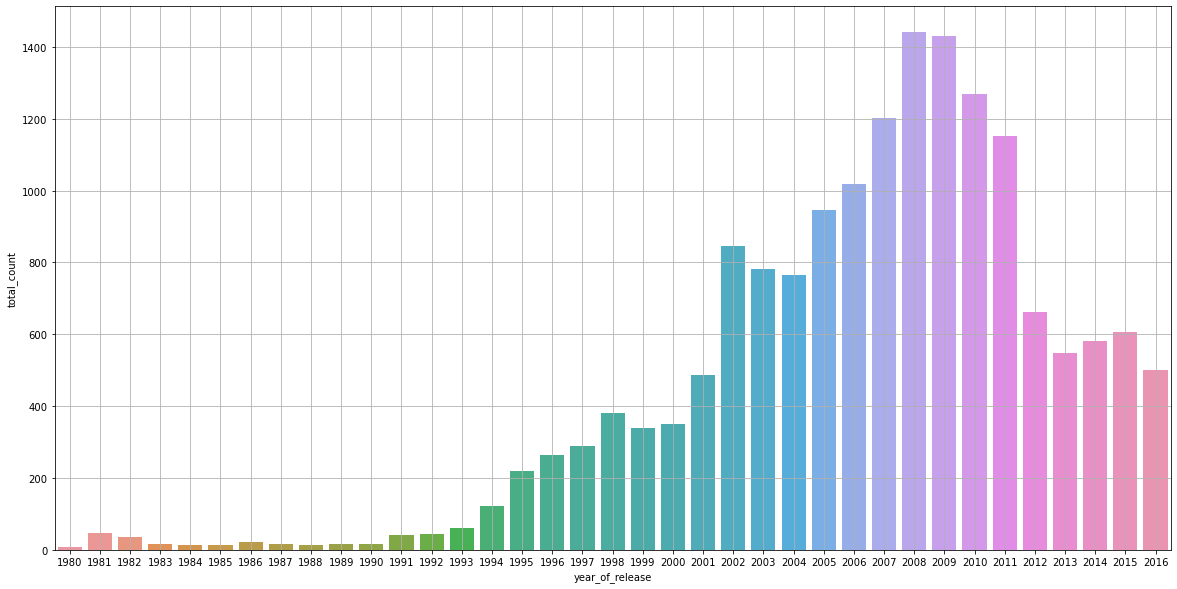

In [55]:
plt.figure(figsize=(20, 10))
sns.barplot(x='year_of_release', y='total_count', data=df_games)
plt.grid()
plt.show()

Из представленного графика видим, что основной пик выпуска игр приходится на 2005-2011 года. Рост начинается с 2001 года, поэтому данные за ранее время можно считать неактуальными

Выберем платформы с наибольшими суммарными продажами:

In [56]:
# Сгруппируем данные по платформе и сумме продаж
df_platform = df.groupby('platform').agg({'total_sales':'sum'}).reset_index()

In [57]:
# Выведем первые 5 платформ по общим продажам
df_platform.sort_values(by='total_sales',ascending=False).head()

,platform,total_sales
16,PS2,"1,247.16"
28,X360,966.61
17,PS3,935.19
26,Wii,903.31
4,DS,804.28


Как видим, наиболее успешные платформы были `PS2`, `X360`, `PS3`, `Wii`, `DS`. Посмотрим как менялись продажи по данным платформам - построим распределение по годам:

In [58]:
# Сделаем срез данных основного датафрейма с 2001 года и выберем наиболее успешные платформы по суммарным продажам
df_actualy = df.query('year_of_release >= 2001 & platform == ["PS2", "X360", "PS3", "Wii", "DS"]')

In [59]:
df_actualy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,None,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


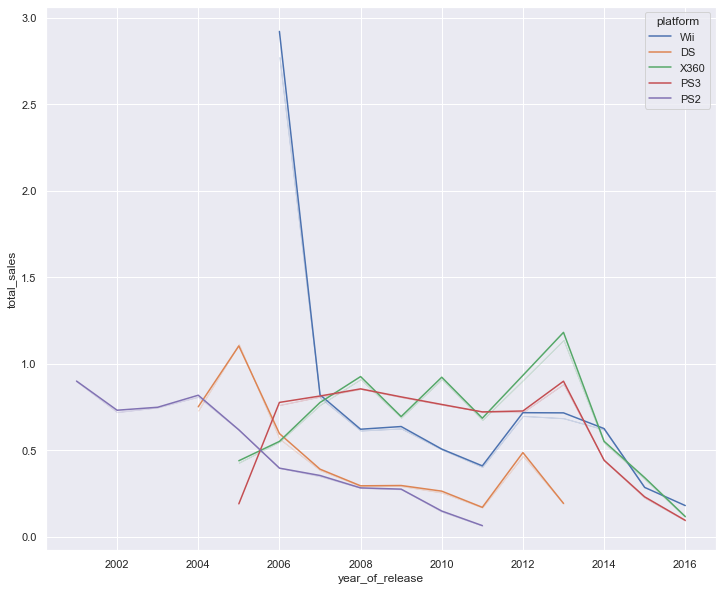

In [60]:
# Построим график распределения по годам
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(data=df_actualy, x='year_of_release', y='total_sales', hue='platform', ci=False)

Видим, что продажи данных платформ со временем падают. Сроки платформ:
- `PS2` - с 2001 по 2011 (10 лет);
- `X360` - с 2005 по 2016 (11 лет)
- `PS3` - с 2005 по 2016 (11 лет)
- `Wii` - с 2006 по 2016 (10 лет)
- `DS` - с 2004 по 2013 (9 лет)

`X360` и `PS3` можно сказать, самые успешные - "пик" приходился на 2013 год. Ну а больше продаж на `PS2`

In [61]:
df_platform

,platform,total_sales
0,2600,89.01
1,3DO,0.10
2,3DS,258.53
3,DC,15.95
4,DS,804.28
5,GB,254.43
6,GBA,313.73
7,GC,198.66
8,GEN,28.35
9,GG,0.04


In [62]:
# Выделим уникальные платформы
df_platform_unique = df['platform'].unique()
df_platform_unique

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

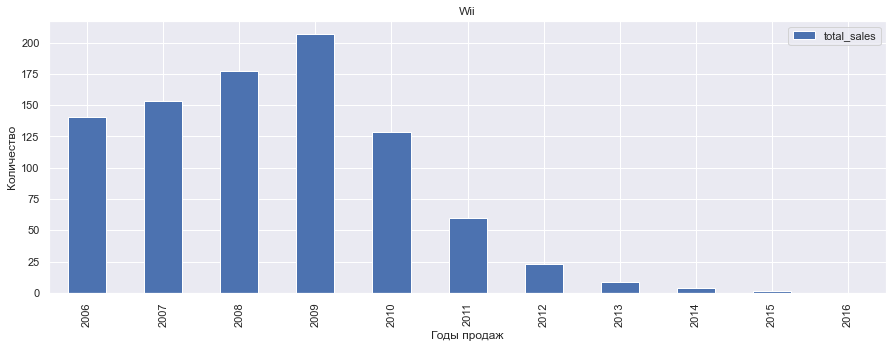

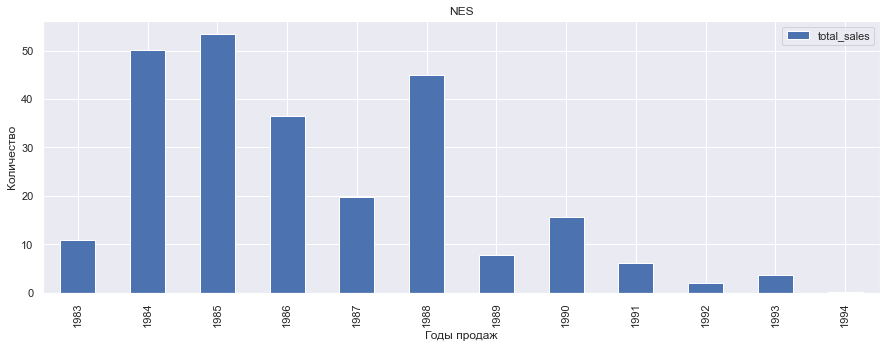

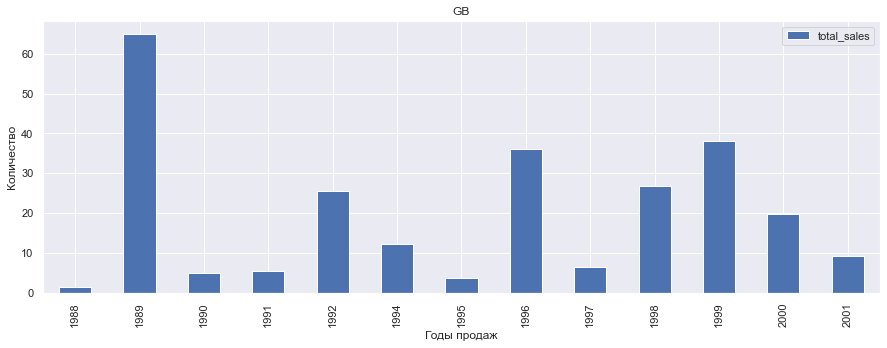

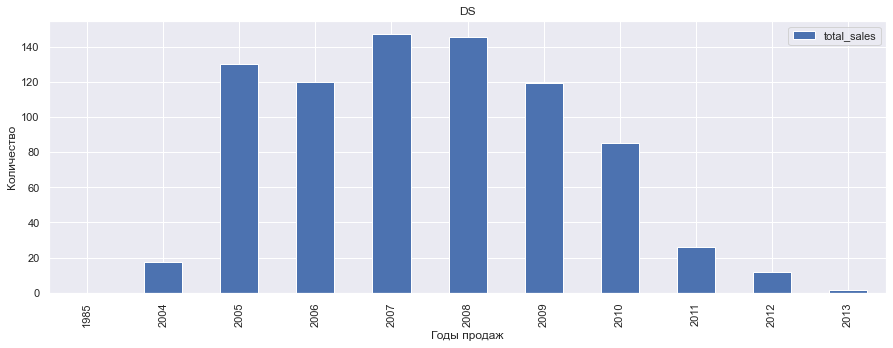

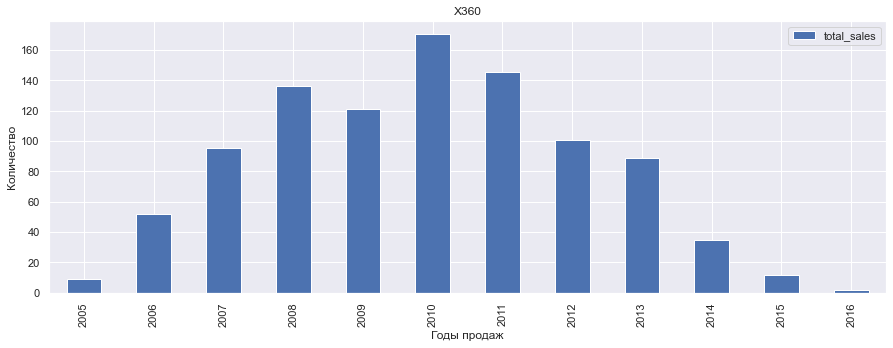

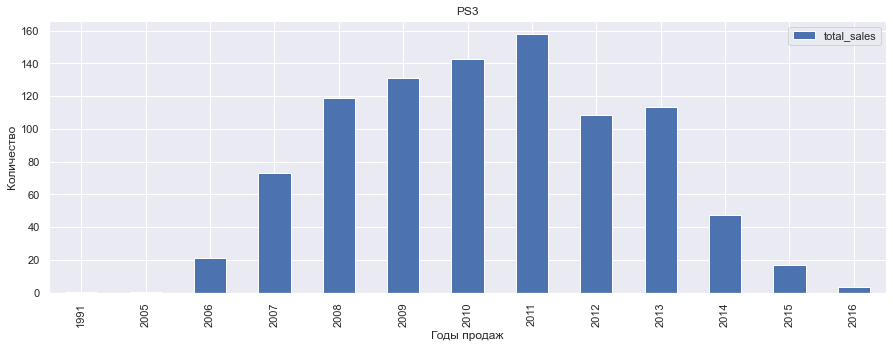

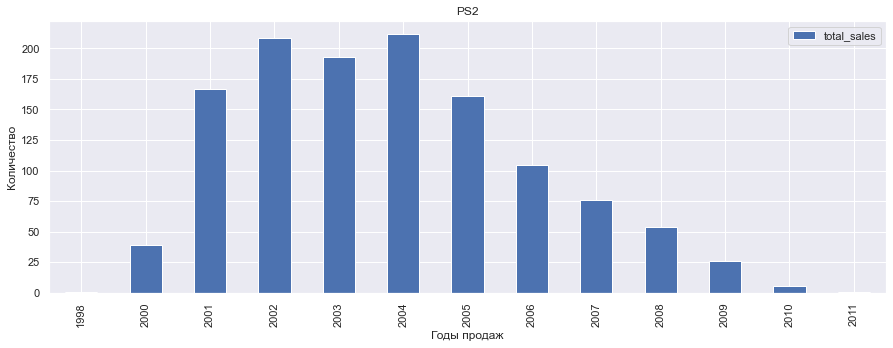

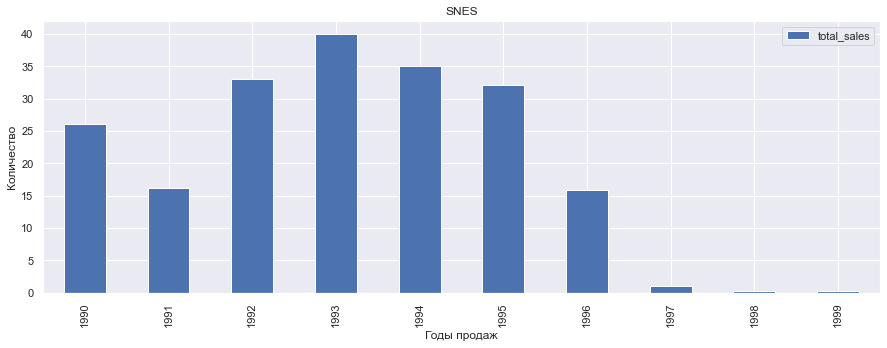

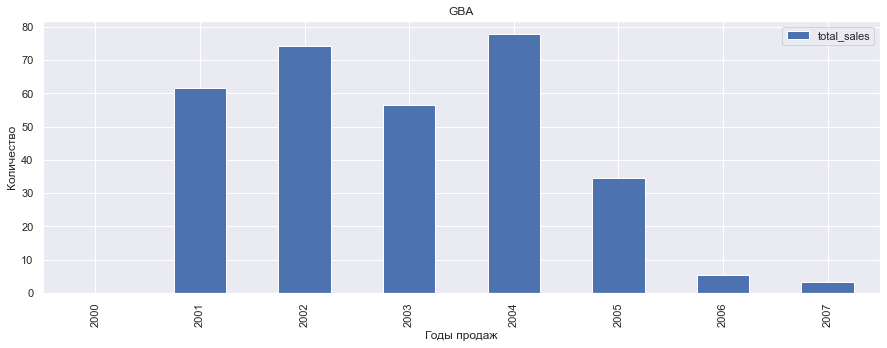

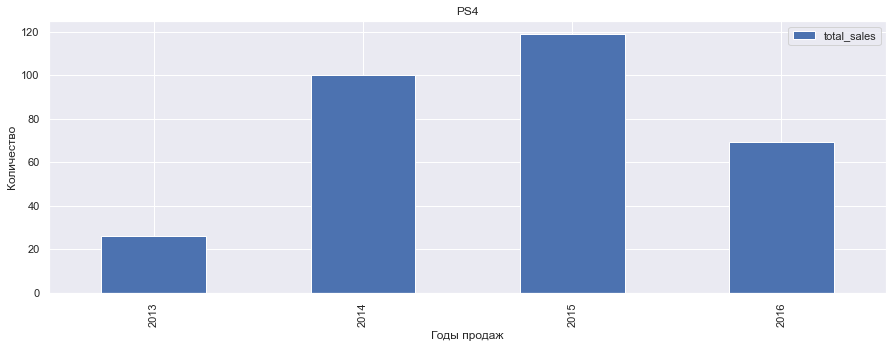

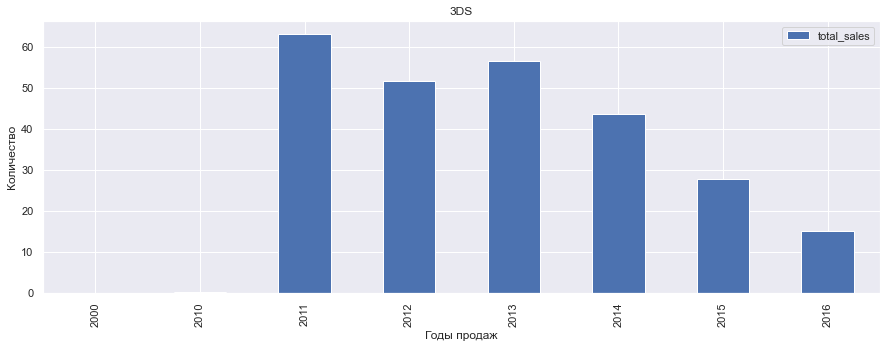

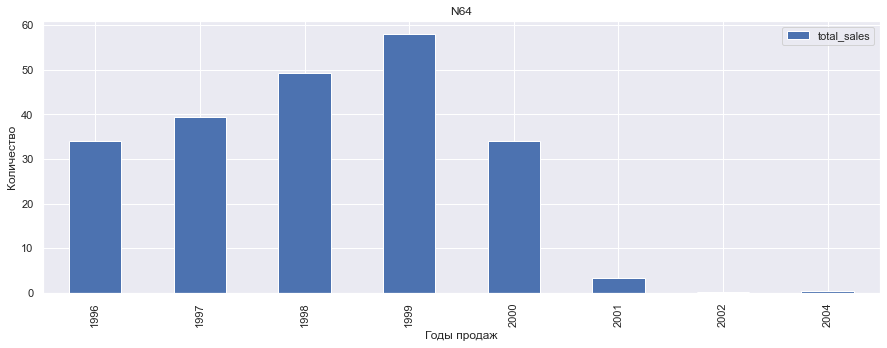

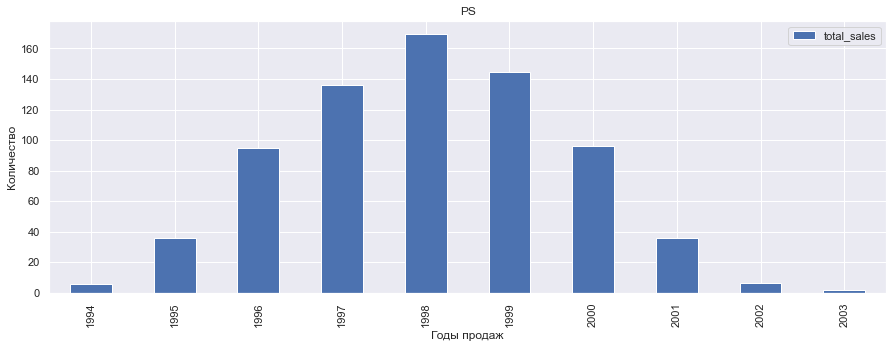

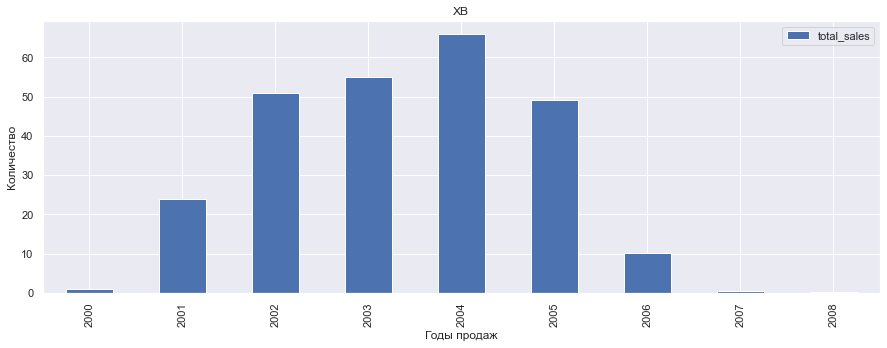

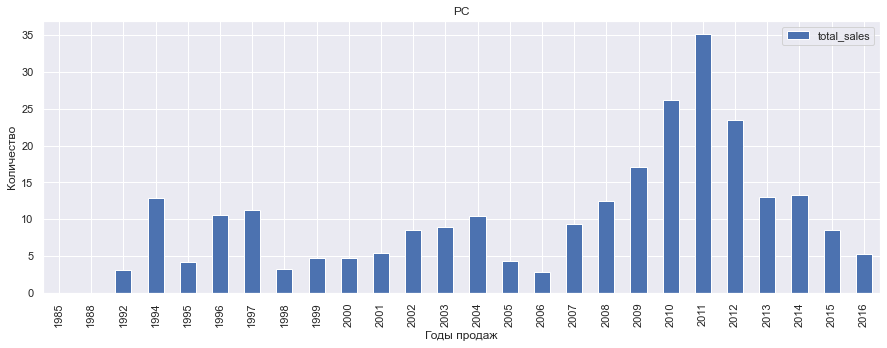

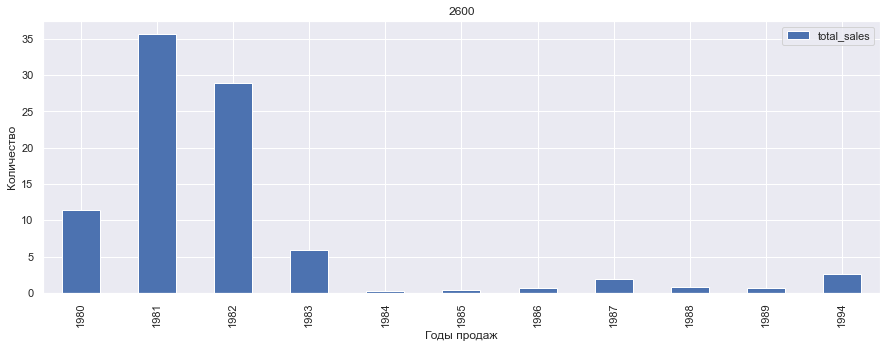

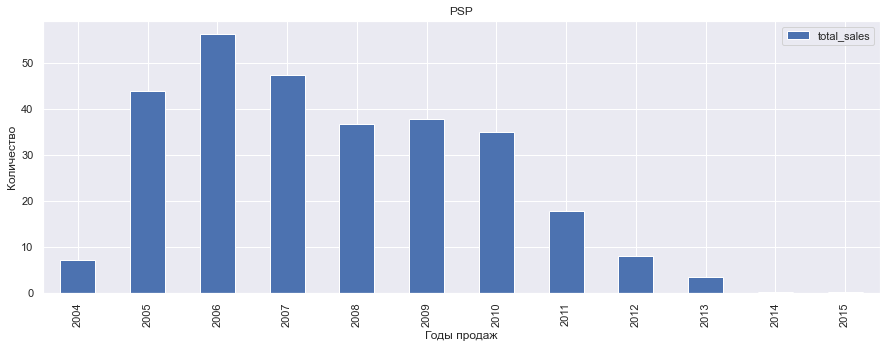

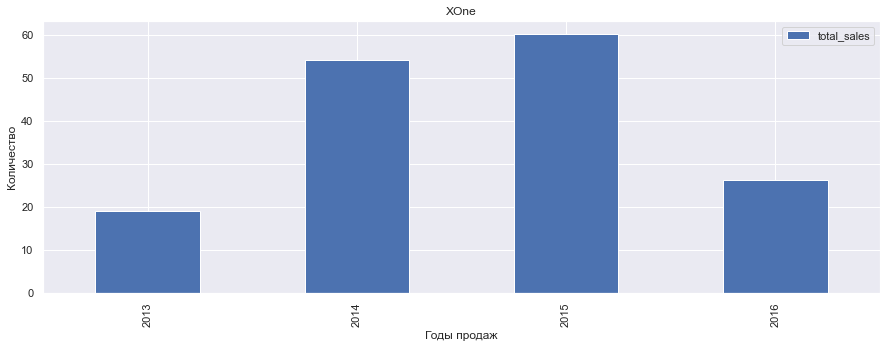

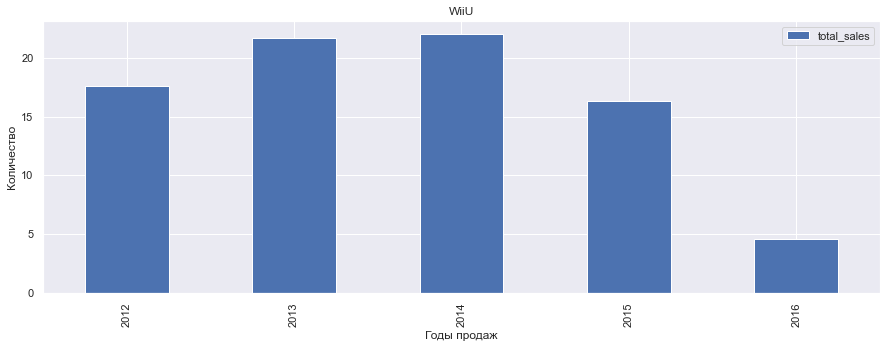

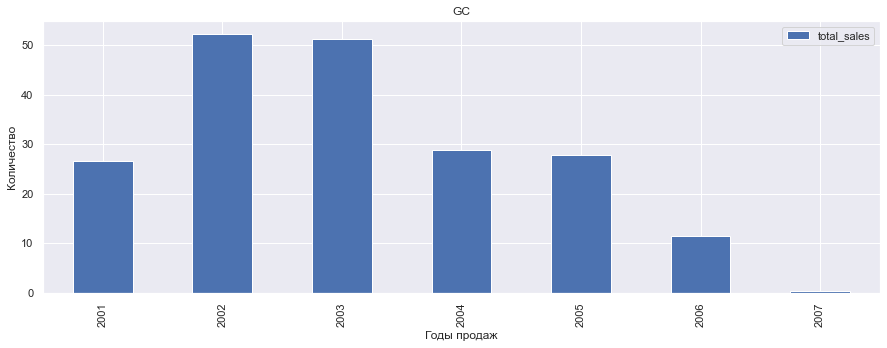

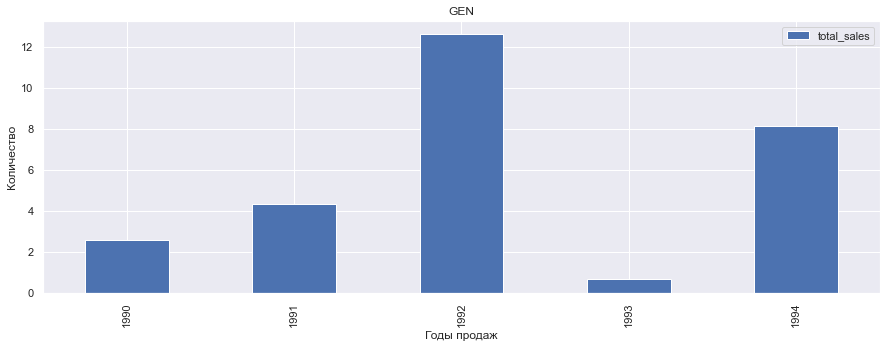

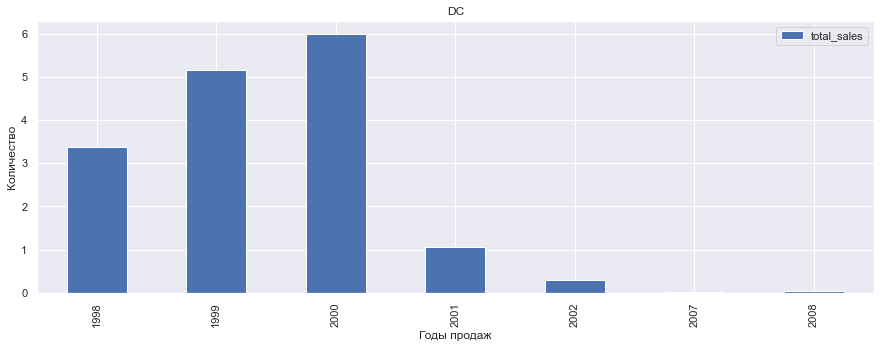

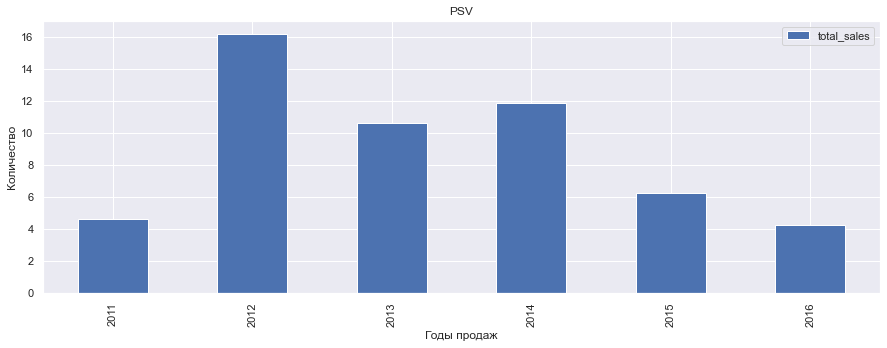

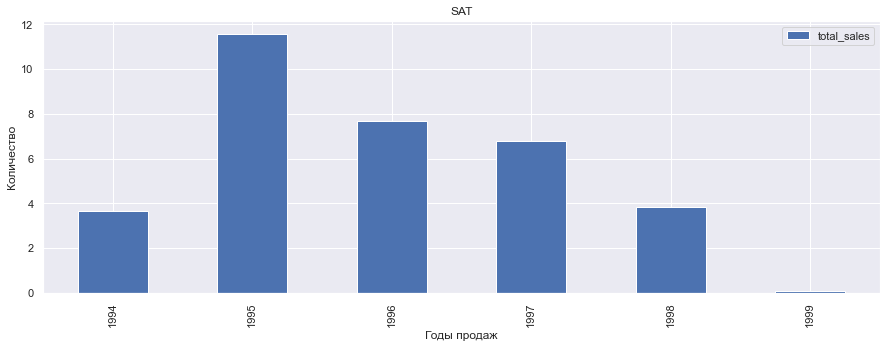

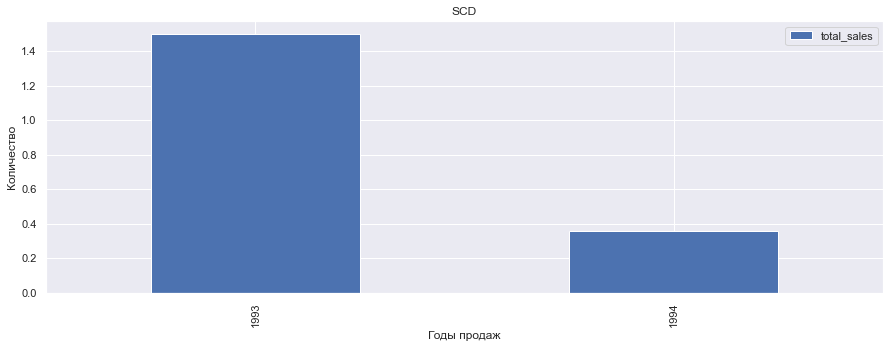

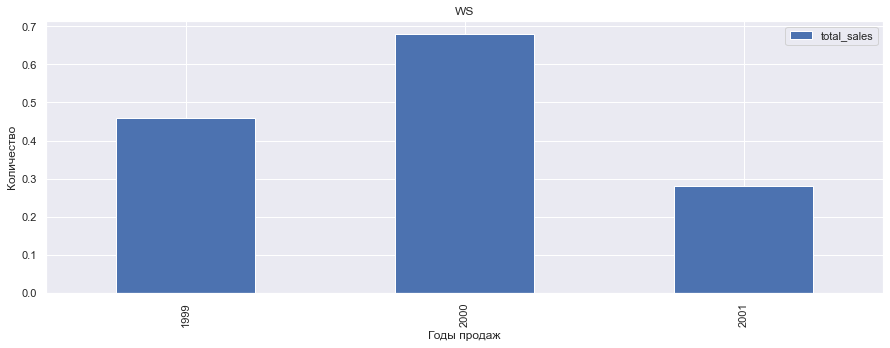

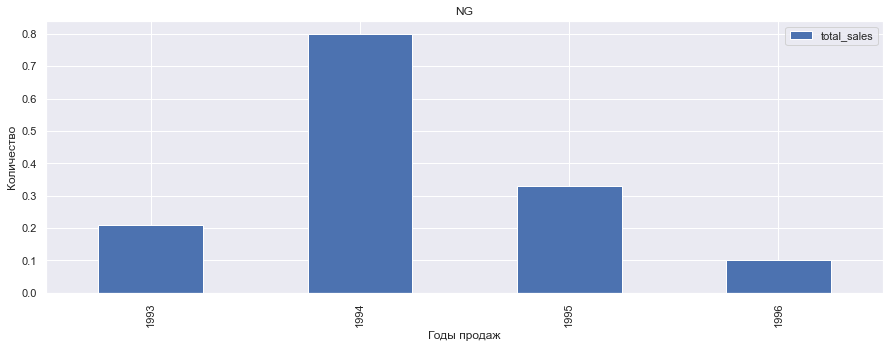

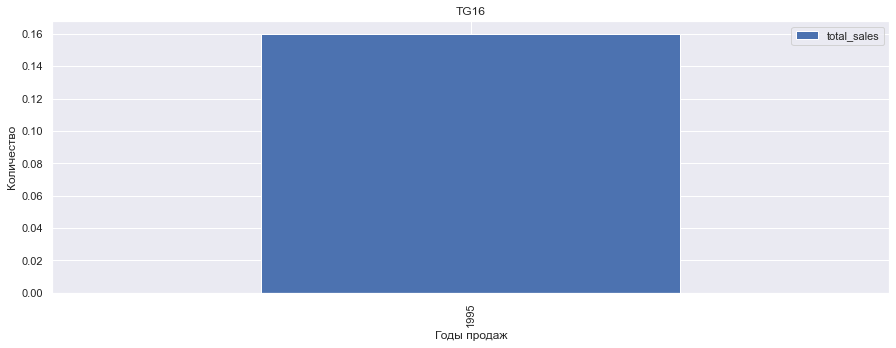

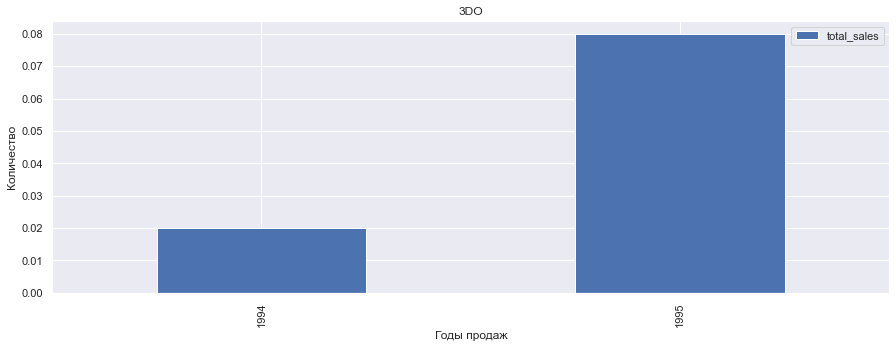

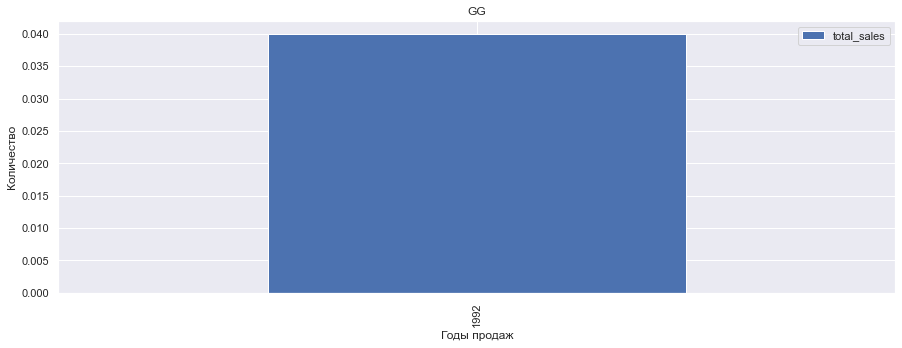

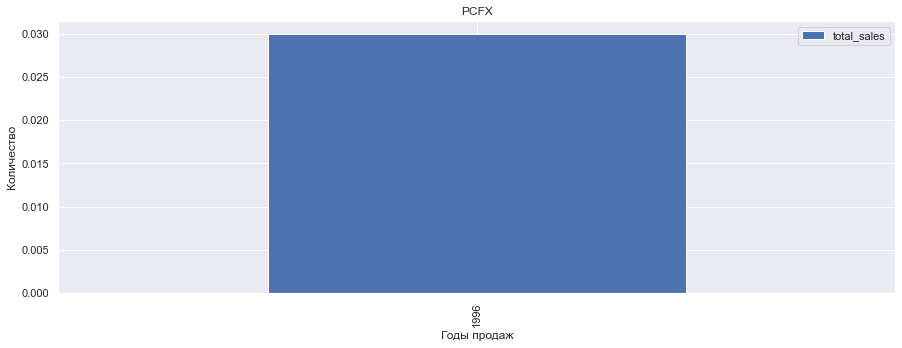

In [63]:
# Составим графики общих продаж на каждую платформу
for platform in df_platform_unique:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(15,5))
       
    plt.title(platform)
    plt.xlabel('Годы продаж')
    plt.ylabel('Количество')
    plt.show()

Изучив представленные графиики, можно сделать вывод, что в среднем срок платформ 6-10 лет.Но есть платформы, которые просуществовали минимальное количество лет. Только `PC` продается на протяжении длительного времени. Появление новых платформ приходится на начало 2000-х годов. Ну а конец 90-х - это закат старых платформ, в связи с повсеместным появлением персональных компьютеров

Посмотрим, есть ли платформы, которые идут в рост? На основании этих данных мы построим прогноз на 2017 год

In [64]:
# Сделаем срез данных за последние 3 года
df_actualy_new = df.query('year_of_release >= 2014')

In [65]:
df_actualy_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,None,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,None,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


Получившийся датафрейм сгруппируем по сумме продаж и выведем первые 5.

In [66]:
df_platform_new = df_actualy_new.groupby('platform').agg({'total_sales':'sum'}).reset_index()

In [67]:
df_platform_new.sort_values('total_sales', ascending=False).head()

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


In [68]:
# Сделаем срез данных основного датафрейма с 2014 года и выберем наиболее успешные платформы по суммарным продажам 
df_actualy_new = df.query('year_of_release >= 2014 & platform == ["PS4", "XOne", "3DS", "PS3", "X360"]')

In [69]:
df_actualy_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,None,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,None,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


Построим график

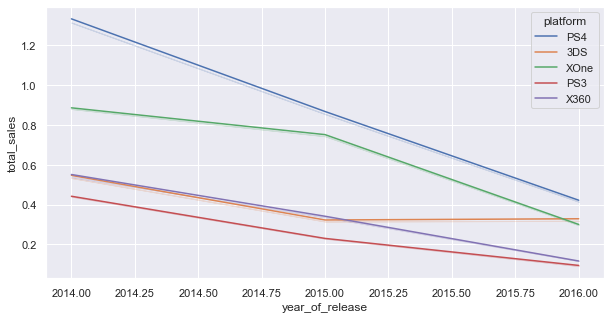

In [70]:
# Построим график распределения по годам
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(data=df_actualy_new, x='year_of_release', y='total_sales', hue='platform', ci=False)

Видим, что только одна платформа выходит в плюс, у остальных падение. Но за 3 года лидеры:
- `PS4` - 288.15 млн. продано
- `XOne` - 140.36 млн. продано
- `3DS ` - 86.68 млн. продано
- `PS3` - 68.18 млн. продано
- `X360` - 48.22 млн. продано

Можно предполагать, что потенциально прибыльными будут 4 платформы будут потенциально прибыльными, хотя у всех, за исключением `3DS` идет спад

#### Построим график "Ящик с усами" по глобальным продажам игр в разбивке по платформам:

In [71]:
# Возьмем период роста компьютерных игр
df_boxplot = df.query('year_of_release >= 2014')

(0.0, 2.0)

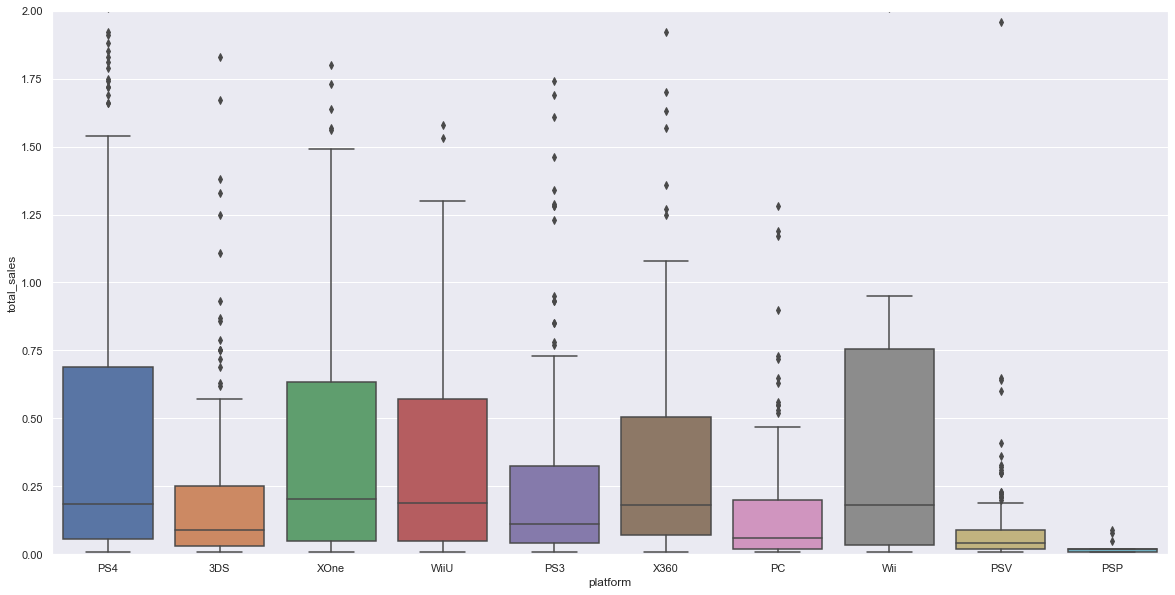

In [72]:
ax = plt.figure(figsize=(20,10))
ax = sns.boxplot(x='platform', y='total_sales', data = df_boxplot)
plt.ylim(0,2)

Мы получили данные по платформам с 2014 года и можем визуально оценить характеристики распределения. Видим, что наибольшие  стабильные продажи компьютерных игр имеют платформы `PS4`, `XOne`, `X360`, `WiiU`, `Wii`. Много выбросов, что означает, что были отдельные игры, у которых было большое количество продаж на определенной платформе

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Выберем лидера продаж за последние 3 года - `PS4` и посмотрим, есть ли взаимосвязь между отзывами критиков и пользователей

In [73]:
# Сделаем срез по `PS4`
df_ps4 = df[df['platform'] == 'PS4']

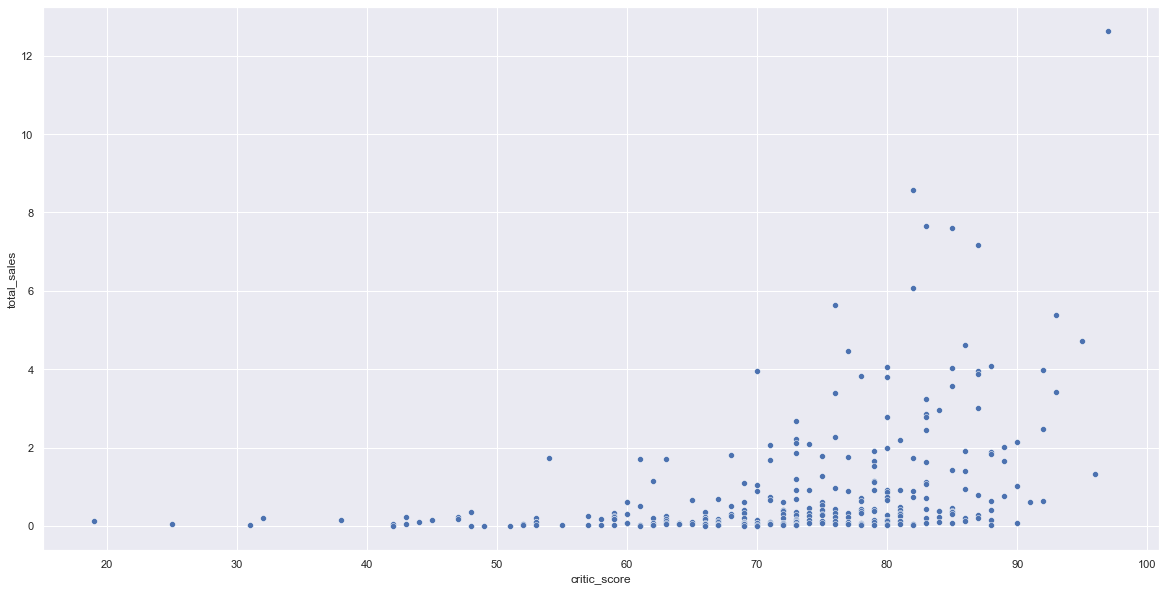

In [74]:
# Построим диаграмму рассеяния взаимосвязи оценки критиков и продаж
ax = plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_ps4,x='critic_score', y='total_sales')

Теперь рассмотрим пользователей:

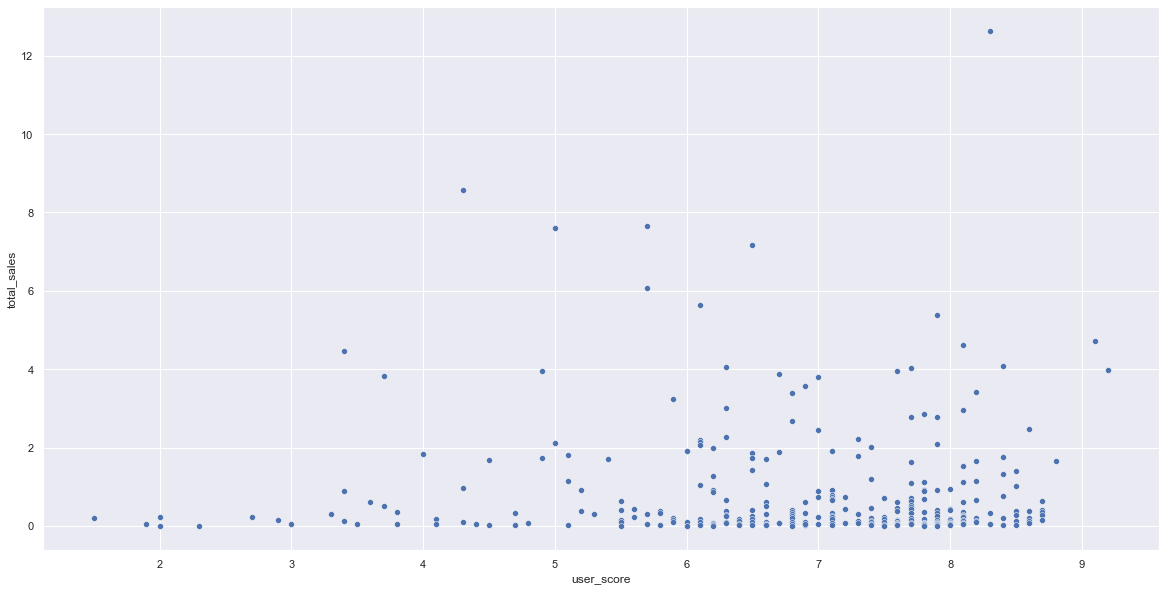

In [75]:
# Построим диаграмму рассеяния взаимосвязи оценки пользователей и продаж
ax = plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_ps4,x='user_score', y='total_sales')

Посчитаем корреляцию между отзывами и продажами:

In [76]:
df_ps4[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.00,-0.02,0.39
user_score,-0.02,1.00,0.56
critic_score,0.39,0.56,1.00


##### Сформулируем выводы:
Как мы знаем, если с ростом первой величины растет вторая, то корреляция положительная. Если при изменении одной величины другая остается прежней, то коэффициент равен 0. Если рост одной величины связан с уменьшением другой, то коэффициент отрицательный.
Судя по нашей диаграмме рассеивания и таблице корреляции взаимосвязь между оценкой критиков и продажами положительная, то можно утверждать, что высокие оценки критиков влияют на продажи.
И в то же время можно утверждать, что оценки пользователей не влияют на продажи

Такой же вывод можно распространить и на продажи игр на остальных платформах: рейтинг критиков больше влияет на продажу компьютерных игр, чем отзывы пользователей.

#### Посмотрим на общее распределение игр по жанрам:

Рассмотрим прибыльность жанра, т.е. какой жанр приносит стабильный доход. Будем учитывать данные за актуальный период с 2014 года

In [77]:
# Возьмем актуальный период
df_genre = df.query('year_of_release >= 2014')

In [78]:
# Осуществим группировку и выведем среднее значение
df_genre_n = df_genre.groupby('genre')[['total_sales']].mean().sort_values(by='total_sales', ascending=False).reset_index()

In [79]:
df_genre_n

,genre,total_sales
0,Shooter,1.34
1,Sports,0.68
2,Platform,0.48
3,Fighting,0.47
4,Role-Playing,0.46
5,Racing,0.40
6,Misc,0.33
7,Action,0.32
8,Simulation,0.30
9,Puzzle,0.16


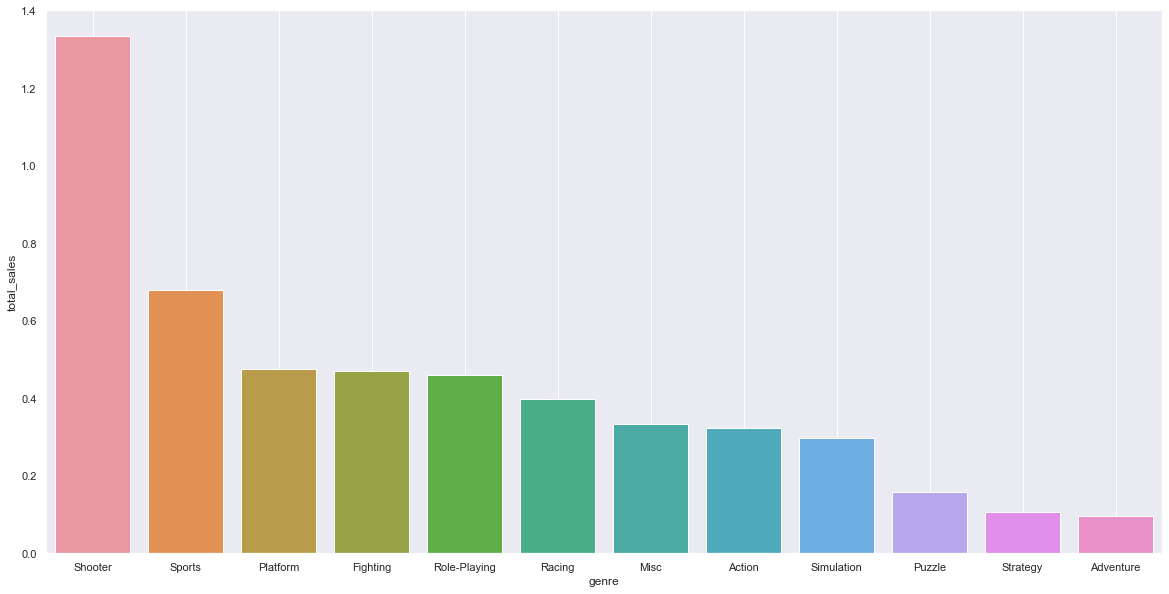

In [80]:
# Построим график
plt.figure(figsize=(20, 10))
sns.barplot(x='genre', y='total_sales', data=df_genre_n)
plt.grid()
plt.show()

Как видим, большую среднюю прибыль приносят жанры `Shooter`, `Sports`, `Platform`

## Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (ТОП-5):

Будем использовать датафрейм за все время

In [81]:
# Вспомним датафрейм
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None,0.01


Сгруппируем данные по сумме продаж в Северной Америке:

In [82]:
df_platform_na = df.query('year_of_release >= 2014')

In [83]:
df_platform_na_n = df_platform_na.groupby('platform')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).reset_index()

In [84]:
# Выведем топ-5 на экран
df_platform_na_n.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Text(0.5, 1.0, 'North America')

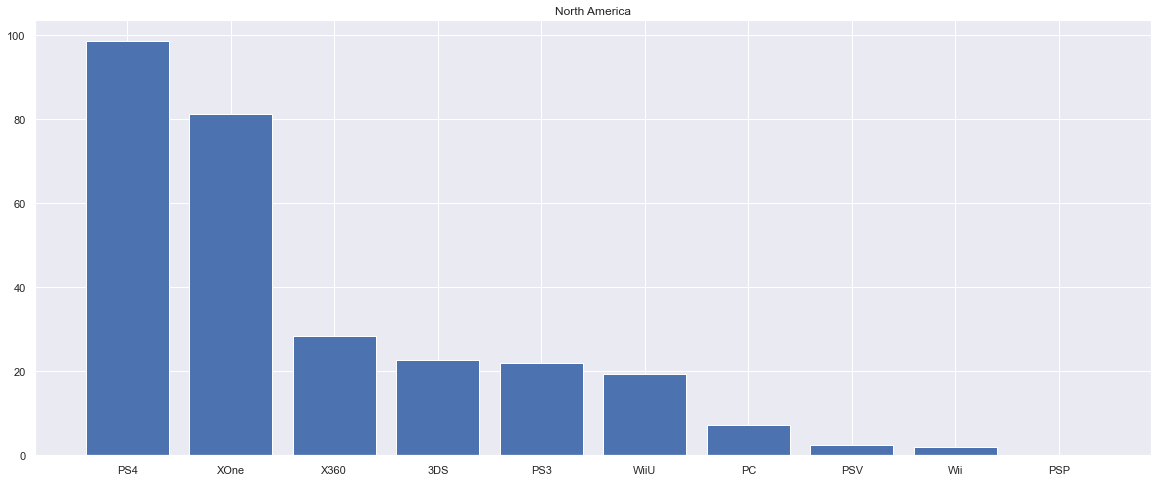

In [85]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('platform', 'na_sales', data=df_platform_na_n)
ax.set_title("North America")

Как мы видим, самые популярные платформы в Северной Америке - `PS4`, `XOne`, `X360`, `3DS`, `PS3`. 

Сгруппируем данные по сумме продаж в Европе:

In [86]:
df_platform_eu = df.query('year_of_release >= 2014')

In [87]:
df_platform_eu_n = df_platform_eu.groupby('platform')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).reset_index()

In [88]:
df_platform_eu_n.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Text(0.5, 1.0, 'Euro')

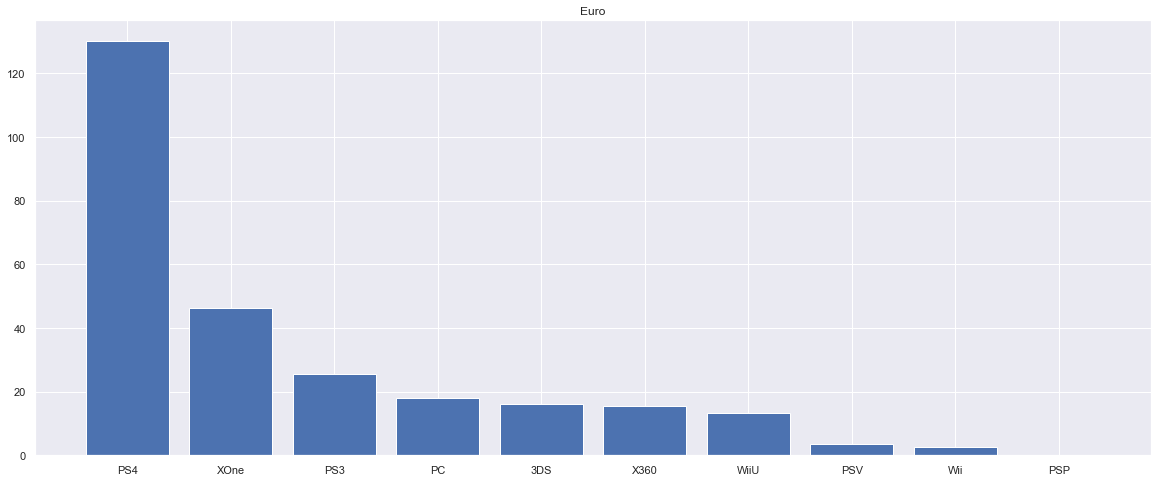

In [89]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('platform', 'eu_sales', data=df_platform_eu_n)
ax.set_title("Euro")

Cамые популярные платформы в Европе - `PS4`, `XOne`, `PS3`, `PC`, `3DS`. 

Сгруппируем данные по сумме продаж в Японии:

In [90]:
df_platform_jp = df.query('year_of_release >= 2014')

In [91]:
df_platform_jp_n = df_platform_jp.groupby('platform')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).reset_index()

In [92]:
df_platform_jp_n.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Text(0.5, 1.0, 'Japan')

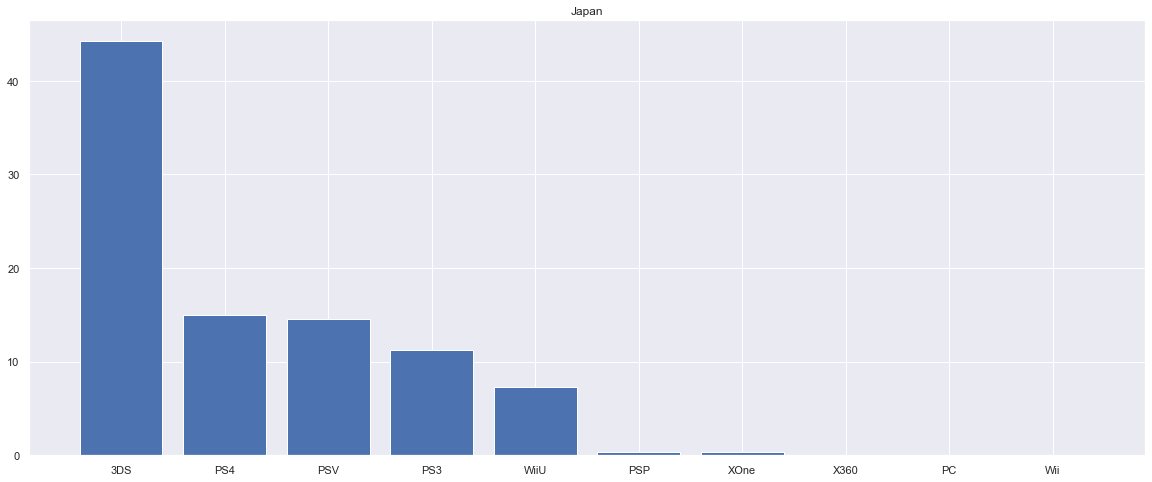

In [93]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('platform', 'jp_sales', data=df_platform_jp_n)
ax.set_title("Japan")

Cамые популярные платформы в Японии - `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`. 

##### Промежуточные выводы:
Можно сделать вывод, что если в Европе и Северной Америке популярные платформы примерно одинаковые, то в Японии в лидерах совсем другая платформа. В `PS4` играют во всем мире

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (ТОП-5):

Осуществим группировку по сумме продаж в Северной Америке на актуальный период:

In [94]:
df_sales_na = df.query('year_of_release >= 2014')

In [95]:
df_sales_na_n = df_sales_na.groupby('genre')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).reset_index()

In [96]:
df_sales_na_n.head()

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Text(0.5, 1.0, 'North America')

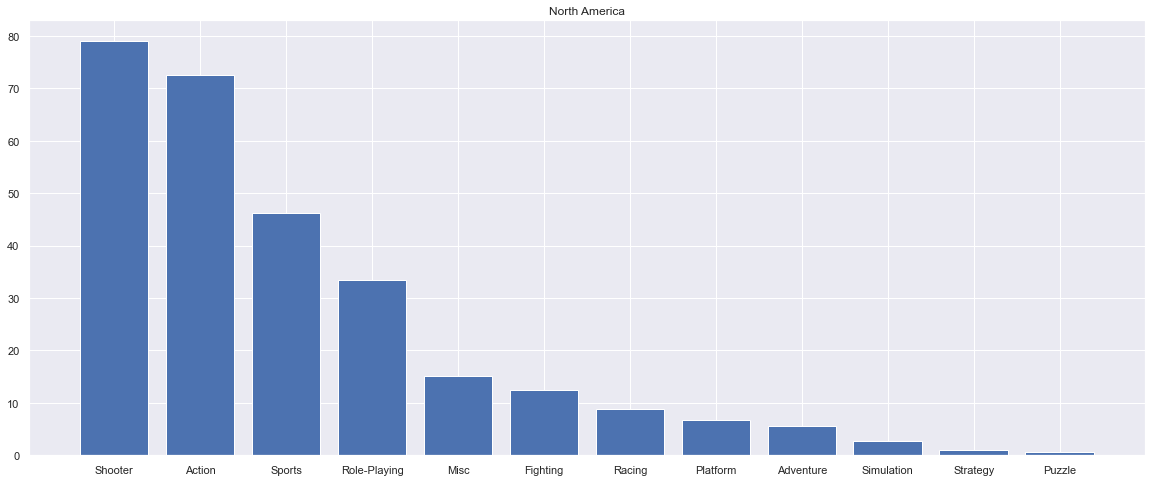

In [97]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('genre', 'na_sales', data=df_sales_na_n)
ax.set_title("North America")

Самые популярные жанры в Северной Америке: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`.

Осуществим группировку по сумме продаж в Европе:

In [98]:
df_sales_eu = df.query('year_of_release >= 2014')

In [99]:
df_sales_eu_n = df_sales_eu.groupby('genre')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).reset_index()

In [100]:
df_sales_eu_n.head()

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Text(0.5, 1.0, 'Euro')

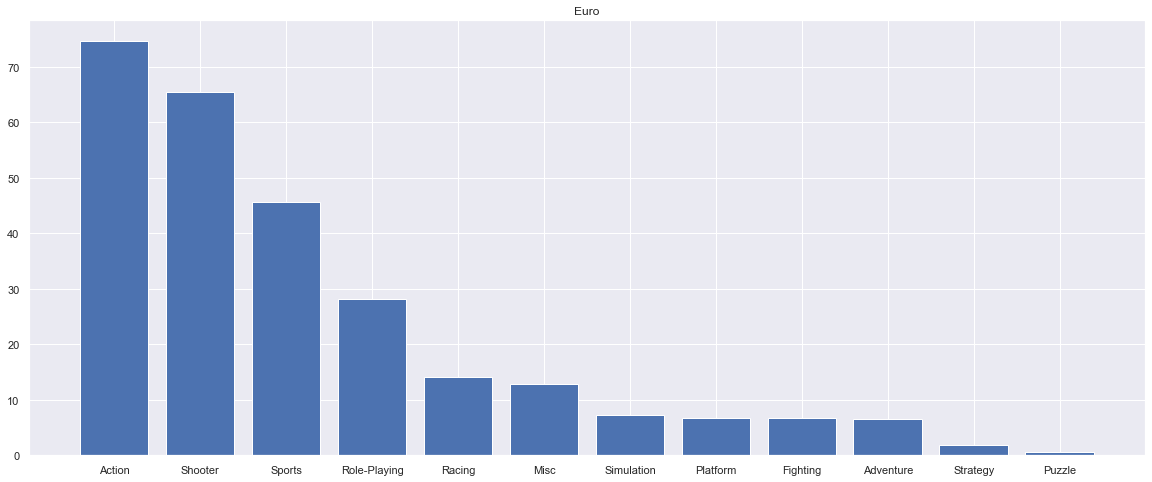

In [101]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('genre', 'eu_sales', data=df_sales_eu_n)
ax.set_title("Euro")

Самые популярные жанры в Европе: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`.

Осуществим группировку по сумме продаж в Японии:

In [102]:
df_sales_jp = df.query('year_of_release >= 2014')

In [103]:
df_sales_jp_n = df_sales_jp.groupby('genre')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).reset_index()

In [104]:
df_sales_jp_n.head()

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Text(0.5, 1.0, 'Japan')

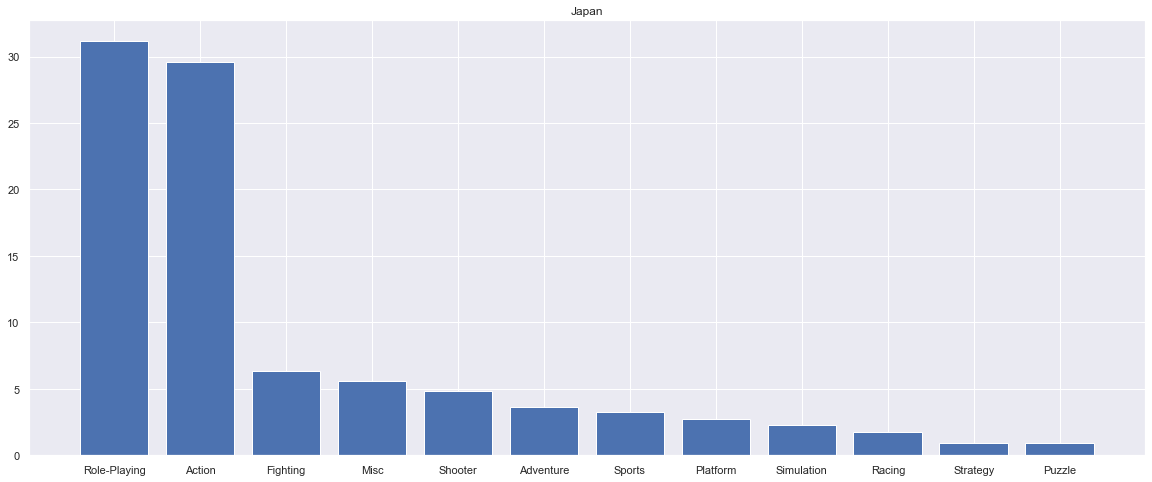

In [105]:
# Построим диаграмму методом `plt.subplots()`
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('genre', 'jp_sales', data=df_sales_jp_n)
ax.set_title("Japan")

Самые популярные жанры в Японии: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`.

##### Промежуточные выводы:
Делаем вывод о том, что жанры в Европе и Северной Америке совпадают, в то время, как в Японии популярен жанр `Role-Playing`, а жанр `Sport` вообще не входит в ТОП-5

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе:

Посмотрим, как влияет рейтинг:

In [106]:
# Выведем общую таблицу
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None,0.01


Напомним описание рейтинга:

    E - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет
    T - «Подросткам»: Игра подходит для лиц от 13 лет
    M - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
    E10+ - «Для всех от 10 лет и старше»
    EC - «Для детей младшего возраста»: Игра подходит для детей от 3 лет
    K-A - «Игры для детей и взрослых»: Игры, содержащие контент, подходящий для широкой аудитории.
    RP - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
    AO - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.



In [107]:
# Создадим переменную, в которой будет указан актуальный срок, чтобы в дальнейшем ее подставлять
df_actuality = df.query('year_of_release >= 2014')

In [108]:
# Осуществим группировку методом pivot_table()
df_rating = df_actuality.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()

In [109]:
df_rating

,rating,eu_sales,jp_sales,na_sales
0,E,58.32,8.98,50.81
1,E10+,27.51,4.77,34.56
2,M,101.85,8.61,104.26
3,T,35.33,16.28,40.28


Можно сделать вывод, что рейтинг с 2014 года поменялся и теперь ему присваивают только 4 значения:
* E - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет
* E10+ - «Для всех от 10 лет и старше»
* M - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
* T - «Подросткам»: Игра подходит для лиц от 13 лет



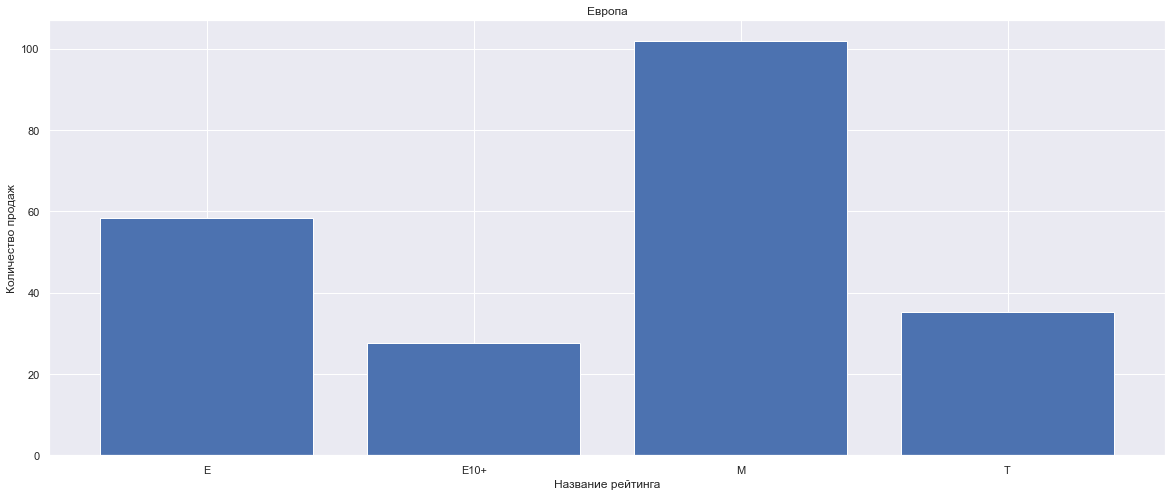

In [110]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('rating', 'eu_sales', data=df_rating)
ax.set_title("Европа")
plt.xlabel('Название рейтинга')
plt.ylabel('Количество продаж')
plt.show()

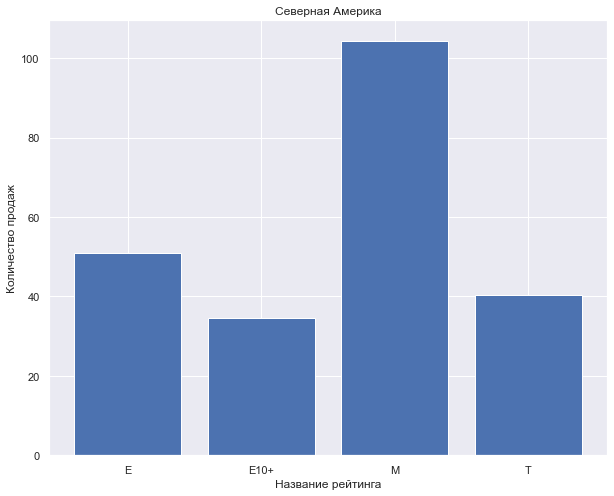

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar('rating', 'na_sales', data=df_rating)
ax.set_title("Северная Америка")
plt.xlabel('Название рейтинга')
plt.ylabel('Количество продаж')
plt.show()

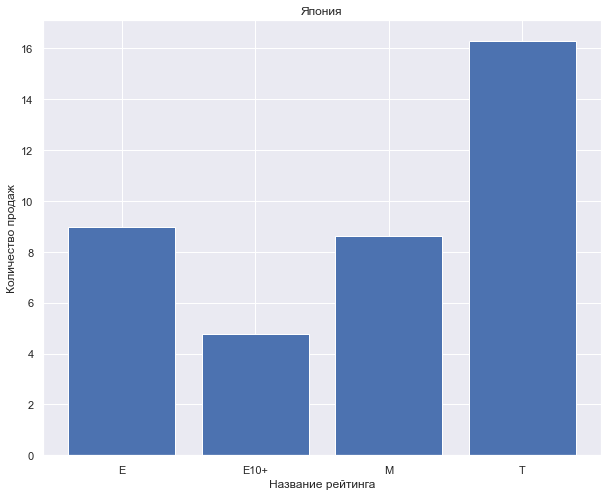

In [112]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar('rating', 'jp_sales', data=df_rating)
ax.set_title("Япония")
plt.xlabel('Название рейтинга')
plt.ylabel('Количество продаж')
plt.show()

Изучив графики, можно сделать выводы, что в Европе и Северной Америке рейтинги жанров примерно одинаковые, в то время, как в Японии большим спросом пользуются жанры "Для подростков". Жанр «Для всех от 10 лет и старше» так же имеет активные продажи на всех континентах

## Проверим гипотезы

#### Гипотеза № 1: Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

В данной гипотезе содержится одно утверждение. Но пользовательские рейтинги могут быть больше либо мешьше у какой-либо из платформ. Поэтому в данном случае будем применять метод для проверки равенства двух генеральных совокупностей `scipy.stats.ttest_ind()`

Формулируем нулевую гипотезу (Но): средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.
Следовательно, альтернативная гипотеза (Н1): средние пользовательские рейтинги платформ `Xbox One` и `PC`  не одинаковые.

In [113]:
# Посмотрим, как правильно пишется название платформ. Данные будем использовать за актуальный период
df_actuality['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [114]:
# Сделаем выборку по платформам и оценкам пользователей, а пропуски удалим
df_xone = df_actuality[df_actuality['platform']=='XOne']['user_score'].dropna()

In [115]:
df_pc = df_actuality[df_actuality['platform']=='PC']['user_score'].dropna()

In [116]:
df_xone.describe()

count   181.00
mean      6.66
std       1.38
min       1.60
25%       5.90
50%       6.90
75%       7.70
max       9.20
Name: user_score, dtype: float64

In [117]:
df_pc.describe()

count   123.00
mean      6.30
std       1.70
min       1.40
25%       5.35
50%       6.80
75%       7.60
max       9.30
Name: user_score, dtype: float64

In [118]:
# Зададим критический уровень статистической значимости 0.5
alpha = .05

results = st.ttest_ind(
    df_xone,
    df_pc
    )

display('p-значение:',results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.043211377969279555

'Отвергаем нулевую гипотезу'

Нулевая гипотеза отвергнута, следовательно, средние пользовательские рейтинги платформ `Xbox One` и `PC` не одинаковые.

#### Гипотеза № 2: Средние пользовательские рейтинги жанров `Action` и `Sports` разные

В данном случае так же будем применять метод для проверки равенства двух генеральных совокупностей `scipy.stats.ttest_ind()`

Формулируем нулевую гипотезу (Но):  Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.
Альтернативная гипотеза (Н1): средние пользовательские рейтинги жанров `Action` и `Sports`  не одинаковые.

In [119]:
df_actuality['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [120]:
# Выберем интересующие нас столбцы и удалим пропущенные значения за актуальный период
df_action = df_actuality[df_actuality['genre']=='Action']['user_score'].dropna()

In [121]:
df_sports = df_actuality[df_actuality['genre']=='Sports']['user_score'].dropna()

In [122]:
df_action.describe()

count   324.00
mean      6.82
std       1.37
min       2.00
25%       6.30
50%       7.10
75%       7.80
max       9.10
Name: user_score, dtype: float64

In [123]:
df_sports.describe()

count   132.00
mean      5.24
std       1.84
min       0.20
25%       4.00
50%       5.50
75%       6.62
max       8.80
Name: user_score, dtype: float64

In [124]:
# Зададим критический уровень статистической значимости 0.5
alpha = .05

results = st.ttest_ind(
    df_action,
    df_sports
    )

display('p-значение:',results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

9.072635806397744e-22

'Отвергаем нулевую гипотезу'

Нулевая гипотеза отвергнута, следовательно, средние пользовательские рейтинги платформ `Action` и `Sports` не одинаковые.

### Вывод по работе над проектом

В нашем проекте мы анализировали данные продаж компьютерных игр интернет-магазина. Перед началом анализа мы изучили информацию файла, подготовили данные для анализа: привели названия столбцов к нижнему регистру, преобразовали типы данных, заполнили пропуски, но где это сделать было невозможно, то либо удалили строки, либо оставили ячейки незаполненными. Посчитали суммарные продажи во всех регионах и добавили эти данные в отдельный столбец. 

Посмотрели, как выпускались игры за разные периоды. Отметили актуальный период с 2014 года, выяснили, за какой примерно период возникают и пропадают новые платформы, узнали какие платформы приносят больше продаж, отметили их как потенциально прибыльные.

Построили "ящик с усами", диаграмму рассеяния; выяснили, как влияют на продажи отзывы критиков и пользователей.
Отметили самые прибыльные жанры. Составили портрет пользователя каждого региона. Выяснили топ-5 жанров и платформ, определили, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Проверили 2 гипотезы: средние двух платформ и двух жанров одинаковый

# Общий вывод

Мы изучили данные о продажах компьютерных игр с 1980 года по 2016 год. Выяснили, что с начала 2001 годов индустрия 
компьютерных игр начинает расти. Расцвет приходит на период 2005-2011 годов. С 2012 по 2016 продажи держатся примерно на 
одном уровне. Если брать актуальный период за последние 3 года, то можно заметить, что в лидерах игровые приставки (PS4, 
XOne, 3DS). Но к сожалению, в последнее время у компьютерных игр идет спад. Но тем не менее, 
пользователи по всему миру продолжают играть в компьютерные игры.

Следует отметить, что при покупке компьютерных игр, пользователи больше ориентируются на рейтинг критиков, чем на рейтинг 
других пользователей.

В компьютерные игры пользователи играют на разных континентах. Но если в Северной Америке и Европе предпочитают 
практически одни и те же жанры, то в Японии предпочитают другие. Самые распространенные жанры – `Shooter`, `Sports`, 
`Platform`, `Fighting`, `Role-Playing`. 
Также можно заметить, что игры для подростков более распространены с Европе и Северной Америке. Игры для детей в Японии 
спросом не пользуются.